In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim

In [3]:
from utils import load_mnist
from trainer import Trainer

In [4]:
def show_image(x):
    if x.dim() == 1:
        x = x.view(int(x.size(0)**0.5), -1)
        
    plt.imshow(x, cmap='gray')
    plt.show()

In [6]:
from argparse import Namespace

config = {
    'train_ratio': .8,
    'batch_size': 256,
    'n_epochs': 50,
    'verbose': 1,
    'btl_size': 2
}

config = Namespace(**config)

print(config)

Namespace(batch_size=256, btl_size=2, n_epochs=50, train_ratio=0.8, verbose=1)


In [7]:
train_x, train_y = load_mnist(flatten=True)
test_x, test_y = load_mnist(is_train=False, flatten=True)

train_cnt = int(train_x.size(0) * config.train_ratio)
valid_cnt = train_x.size(0) - train_cnt

# Shuffle dataset to split into train/valid set.
indices = torch.randperm(train_x.size(0))
train_x, valid_x = torch.index_select(
    train_x,
    dim=0,
    index=indices
).split([train_cnt, valid_cnt], dim=0)
train_y, valid_y = torch.index_select(
    train_y,
    dim=0,
    index=indices
).split([train_cnt, valid_cnt], dim=0)

print("Train:", train_x.shape, train_y.shape)
print("Valid:", valid_x.shape, valid_y.shape)
print("Test:", test_x.shape, test_y.shape)

Train: torch.Size([48000, 784]) torch.Size([48000])
Valid: torch.Size([12000, 784]) torch.Size([12000])
Test: torch.Size([10000, 784]) torch.Size([10000])


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [8]:
from model import Autoencoder

In [9]:
model = Autoencoder(btl_size=config.btl_size)
optimizer = optim.Adam(model.parameters())
crit = nn.MSELoss()

trainer = Trainer(model, optimizer, crit)

In [10]:
trainer.train((train_x, train_x), (valid_x, valid_x), config)

Epoch(1/50): train_loss=7.4151e-02  valid_loss=5.2678e-02  lowest_loss=5.2678e-02
Epoch(2/50): train_loss=5.0142e-02  valid_loss=4.7328e-02  lowest_loss=4.7328e-02
Epoch(3/50): train_loss=4.7081e-02  valid_loss=4.5350e-02  lowest_loss=4.5350e-02
Epoch(4/50): train_loss=4.5120e-02  valid_loss=4.3737e-02  lowest_loss=4.3737e-02
Epoch(5/50): train_loss=4.4037e-02  valid_loss=4.2299e-02  lowest_loss=4.2299e-02
Epoch(6/50): train_loss=4.3202e-02  valid_loss=4.2764e-02  lowest_loss=4.2299e-02
Epoch(7/50): train_loss=4.2347e-02  valid_loss=4.1177e-02  lowest_loss=4.1177e-02
Epoch(8/50): train_loss=4.2281e-02  valid_loss=4.0985e-02  lowest_loss=4.0985e-02
Epoch(9/50): train_loss=4.1959e-02  valid_loss=4.0603e-02  lowest_loss=4.0603e-02
Epoch(10/50): train_loss=4.1418e-02  valid_loss=4.1001e-02  lowest_loss=4.0603e-02
Epoch(11/50): train_loss=4.0794e-02  valid_loss=3.9829e-02  lowest_loss=3.9829e-02
Epoch(12/50): train_loss=4.0247e-02  valid_loss=3.8889e-02  lowest_loss=3.8889e-02
Epoch(13/50):

## Mean value in each space

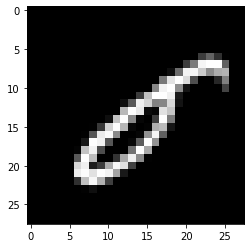

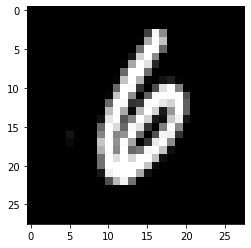

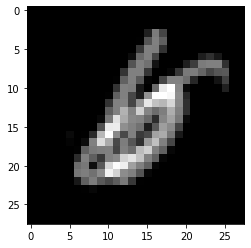

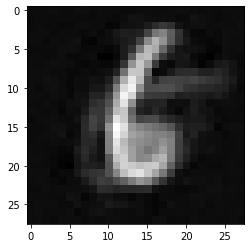

In [11]:
with torch.no_grad():
    import random

    index1 = int(random.random() * test_x.size(0))
    index2 = int(random.random() * test_x.size(0))
    
    z1 = model.encoder(test_x[index1].view(1, -1))
    z2 = model.encoder(test_x[index2].view(1, -1))

    recon = model.decoder((z1 + z2) / 2).squeeze()

    show_image(test_x[index1])
    show_image(test_x[index2])
    show_image((test_x[index1] + test_x[index2]) / 2)
    show_image(recon)